In [1]:
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
slibt = pq.read_table('HoGentOnlineMetingenSlibAntwerpenZuid.parquet')

In [3]:
import pandas as pd
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1500)

In [4]:
slib = slibt.to_pandas()
slib.shape

(1051200, 53)

In [5]:
slib.head()

,HT1_16199,HT_06410,HT_12498,HT_16140,HT_16141,HT_16142,HT_16154,HT_16158,HT_16162,HT_16172,HT_16176,HT_16183,HT_16184,HT_16185,HT_16201,HT_16202,HT_16203,HT_16503,HT_16504,HT_16514,HT_16515,HT_16560,HT_16562,HT_16563,HT_16564,HT_16581,HT_16582,HT_16583,HT_16584,HT_16585,HT_16586,HT_16587,HT_16590,HT_16618,HT_16671,HT_16673,HT_16676,HT_16806,HT_168061,HT_16860,HT_16861,HT_16877,HT_16880,HT_16885,HT_16893,HT_16894,HT_16895,HT_16896,HT_16899,HT_6210,HT_6310,HT_A16503,HT_A16504
,m³ Niveau buffer voor gisting (F_CV),kg/h Berekende slibdoorzet indiktafel3 (F_CV),g/l Slibconcentratie beluchting 3 (F_CV),% droge stof meting (F_CV),% droge stof meting (F_CV),% droge stof meting (F_CV),L/h Debiet PE naar indiktafel 1 (F_CV),L/h Debiet PE naar indiktafel 2 (F_CV),L/h Debiet PE naar indiktafel 3 (F_CV),m³/h Debiet spuislib (F_CV),cm Niv slibbuffer voor indikking (F_CV),m³/h Debiet slib indiktafel 1 (F_CV),m³/h Debiet slib indiktafel 2 (F_CV),m³/h Debiet slib indiktafel 3 (F_CV),m³/h Debiet voeding slibgisting (F_CV),°C Temperatuur voeding slib (F_CV),% Droge stof voeding slibgisting (F_CV),kW Vermogen Circulatiepomp 1 gisting (F_CV),kW Vermogen Circulatiepomp 2 gisting (F_CV),A Stroom Mixer 1 buffer na gisting (F_CV),A Stroom Mixer 2 buffer na gisting (F_CV),°C Temperatuur buffer naar gisti (F_CV),m³/h Debiet slibcirculatie gisting (F_CV),°C Temperatuur na warmtewisselaar (F_CV),cm Niveaumeting schuimhoogte (F_CV),% droge stof meting (F_CV),% droge stof meting (F_CV),°C Temp voor WW (F_CV),°C Temp toevoer gisting (F_CV),% droge stof meting (F_CV),bar Druk gistingstank (F_CV),°C Temperatuur gistingstank (F_CV),cm Niveau slibbuffer na gisting (F_CV),kW Vermogen Gasomwalscompressor 2 (F_CV),mbar drukmeting gasproductie (F_CV),Nm³/h Debiet gasproductie (F_CV),% Methaangas gehalte (F_CV),kW Geleverd vermogen gasmotor (F_CV),kW Opgenomen vermogen uit net (F_CV),°C Temperatuur CV naar warmtewis. (F_CV),m³/h Debiet cv warmtewisselaar (F_CV),°C Temperatuur warm water (F_CV),°C Temperatuur warmtewisselaar (F_CV),°C Temperatuur koud water (F_CV),m³/h Debiet biogas storing motor (F_CV),m³/h Debiet biogas fakkel (F_CV),m³/h Debiet biogas / brander (F_CV),m³/h Debiet biogas motor (F_CV),m³/h Debiet aargas brander (F_CV),kg/h Berekende slibdoorzet indiktafel1 (F_CV),kg/h Berekende slibdoorzet indiktafel2 (F_CV),% Aansturing Circulatiepomp 1 gisting (F_CV),% Aansturing Circulatiepomp 2 gisting (F_CV)
Tijdsas,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,40.0,-1.0,3.809998,0.820007,0.0,0.149994,523.0,0.0,0.0,183.5,221.0,36.0,0.0,0.0,562.0,15.803325,5.009995,13.0,0.0,0.0,0.0,15.369995,68.029984,48.549988,4.339996,9.079987,2.519989,42.079987,46.269989,4.440002,16.879984,44.602501,129.0,0.0,1025.0,107.5,63.809998,272.000000,62.0,70.539978,15.863322,76.449982,54.320007,54.160004,0.0,0.0,0.0,137.5,0.0,301.666656,-1.0,56.0,0.0
2018-12-01 00:00:30+01:00,40.0,-1.0,3.829987,0.820007,0.0,0.160004,508.0,0.0,0.0,184.0,225.0,37.0,0.0,0.0,304.0,15.799988,5.029999,13.0,0.0,0.0,0.0,15.360001,68.079987,48.540009,4.339996,9.179993,2.489990,42.083324,46.350006,4.339996,16.869986,44.604996,129.0,0.0,1025.5,106.0,63.799988,271.666656,66.0,70.449982,15.859985,76.359985,54.299988,54.169983,0.0,0.0,0.0,137.0,0.0,303.000000,-1.0,56.0,0.0
2018-12-01 00:01:00+01:00,40.0,-1.0,3.779999,0.829987,0.0,0.160004,518.0,0.0,0.0,184.5,226.0,37.0,0.0,0.0,334.0,15.809998,5.049988,13.0,0.0,0.0,0.0,15.350006,68.029999,48.535004,4.339996,9.040009,2.519989,42.086658,46.220001,4.380005,16.859985,44.607491,129.0,0.0,1026.0,104.0,63.779999,271.333344,70.0,70.380005,15.854996,76.259979,54.269989,54.149994,0.0,0.0,0.0,136.0,0.0,299.000000,-1.0,56.0,0.0
2018-12-01 00:01:30+01:00,40.0,-1.0,3.709991,0.829987,0.0,0.149994,548.0,0.0,0.0,185.0,228.0,36.0,0.0,0.0,476.0,15.804993,5.000000,13.0,0.0,0.0,0.0,15.345001,68.000000,48.529999,4.339996,9.059998,2.529999,42.089996,46.269989,4.489990,16.864990,44.609985,129.0,0.0,1025.0,105.5,63.769989,271.000000,74.0,70.309998,15.850006

In [47]:
#Nodig: Table HT_16183 / 16184 / 16185 | 16154 16158 16162 (input)
# 16172
# 16587(temp) / 16562 (m3/h) / HT_16618(kW)
#output: HT_16673: Nm³/h Debiet gasproductie/ HT_16676: %Methaangas gehalte
slibNodig = slib[['HT_16183', 'HT_16184', 'HT_16185', 'HT_16154', 'HT_16158', 'HT_16162', 'HT_16172', 'HT_16587', 'HT_16562', 'HT_16618',
                 'HT_16673', 'HT_16676']]
print(slibNodig.columns)

MultiIndex([('HT_16183',      'm³/h       Debiet slib indiktafel 1 (F_CV)'),
            ('HT_16184',      'm³/h       Debiet slib indiktafel 2 (F_CV)'),
            ('HT_16185',      'm³/h       Debiet slib indiktafel 3 (F_CV)'),
            ('HT_16154',   'L/h        Debiet PE naar indiktafel 1 (F_CV)'),
            ('HT_16158',   'L/h        Debiet PE naar indiktafel 2 (F_CV)'),
            ('HT_16162',   'L/h        Debiet PE naar indiktafel 3 (F_CV)'),
            ('HT_16172',               'm³/h       Debiet spuislib (F_CV)'),
            ('HT_16587',      '°C         Temperatuur gistingstank (F_CV)'),
            ('HT_16562', 'm³/h       Debiet slibcirculatie gisting (F_CV)'),
            ('HT_16618',    'kW     Vermogen Gasomwalscompressor 2 (F_CV)'),
            ('HT_16673',          'Nm³/h       Debiet gasproductie (F_CV)'),
            ('HT_16676',               '%       Methaangas gehalte (F_CV)')],
           )


In [48]:
slibNodig.head(5)

,HT_16183,HT_16184,HT_16185,HT_16154,HT_16158,HT_16162,HT_16172,HT_16587,HT_16562,HT_16618,HT_16673,HT_16676
,m³/h Debiet slib indiktafel 1 (F_CV),m³/h Debiet slib indiktafel 2 (F_CV),m³/h Debiet slib indiktafel 3 (F_CV),L/h Debiet PE naar indiktafel 1 (F_CV),L/h Debiet PE naar indiktafel 2 (F_CV),L/h Debiet PE naar indiktafel 3 (F_CV),m³/h Debiet spuislib (F_CV),°C Temperatuur gistingstank (F_CV),m³/h Debiet slibcirculatie gisting (F_CV),kW Vermogen Gasomwalscompressor 2 (F_CV),Nm³/h Debiet gasproductie (F_CV),% Methaangas gehalte (F_CV)
Tijdsas,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,36.0,0.0,0.0,523.0,0.0,0.0,183.5,44.602501,68.029984,0.0,107.5,63.809998
2018-12-01 00:00:30+01:00,37.0,0.0,0.0,508.0,0.0,0.0,184.0,44.604996,68.079987,0.0,106.0,63.799988
2018-12-01 00:01:00+01:00,37.0,0.0,0.0,518.0,0.0,0.0,184.5,44.607491,68.029999,0.0,104.0,63.779999
2018-12-01 00:01:30+01:00,36.0,0.0,0.0,548.0,0.0,0.0,185.0,44.609985,68.000000,0.0,105.5,63.769989
2018-12-01 00:02:00+01:00,38.0,0.0,0.0,531.0,0.0,0.0,184.0,44.600006,67.940002,0.0,107.0,63.759979


In [49]:
slibNodig.shape

(1051200, 12)

In [50]:
slibNodig.columns = slibNodig.columns.get_level_values(0)
slibNodig.head(5)

,HT_16183,HT_16184,HT_16185,HT_16154,HT_16158,HT_16162,HT_16172,HT_16587,HT_16562,HT_16618,HT_16673,HT_16676
Tijdsas,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,36.0,0.0,0.0,523.0,0.0,0.0,183.5,44.602501,68.029984,0.0,107.5,63.809998
2018-12-01 00:00:30+01:00,37.0,0.0,0.0,508.0,0.0,0.0,184.0,44.604996,68.079987,0.0,106.0,63.799988
2018-12-01 00:01:00+01:00,37.0,0.0,0.0,518.0,0.0,0.0,184.5,44.607491,68.029999,0.0,104.0,63.779999
2018-12-01 00:01:30+01:00,36.0,0.0,0.0,548.0,0.0,0.0,185.0,44.609985,68.000000,0.0,105.5,63.769989
2018-12-01 00:02:00+01:00,38.0,0.0,0.0,531.0,0.0,0.0,184.0,44.600006,67.940002,0.0,107.0,63.759979


In [51]:
#Renaming columns and setting the totals for research purposes
slibNodig['TotaalSlibOpTafels'] = slibNodig['HT_16183']+slibNodig['HT_16184']+slibNodig['HT_16185']
slibNodig = slibNodig.drop(['HT_16183', 'HT_16184', 'HT_16185'], axis=1)
slibNodig['TotaalPENaarTafels'] = slibNodig['HT_16154']+slibNodig['HT_16158']+slibNodig['HT_16162']
slibNodig = slibNodig.drop(['HT_16154', 'HT_16158', 'HT_16162'], axis=1)
tijdsas = slibNodig.index.values.tolist()
new_tijdsas = tijdsas[:-51840]
slibNodig['DebietSpuiSlib'] = slibNodig['HT_16172']
slibNodig = slibNodig.drop('HT_16172', axis=1)

slibNodig['TemperatuurTank'] = slibNodig['HT_16587']
slibNodig = slibNodig.drop('HT_16587', axis=1)

slibNodig['DebietSlibCirculatie'] = slibNodig['HT_16562']
slibNodig = slibNodig.drop('HT_16562', axis=1)

slibNodig['VermogenCompressor'] = slibNodig['HT_16618']
slibNodig = slibNodig.drop('HT_16618', axis=1)

slibNodig['DebietGasproductie'] = slibNodig['HT_16673']
slibNodig = slibNodig.drop('HT_16673', axis=1)

slibNodig['MethaangasGehalte'] = slibNodig['HT_16676']
slibNodig = slibNodig.drop('HT_16676', axis=1)

totSlibArr = slibNodig.TotaalSlibOpTafels.tolist()
totPetArr = slibNodig.TotaalPENaarTafels.tolist()
debietSpuiArr= slibNodig.DebietSpuiSlib.tolist()
tempTankArr= slibNodig.TemperatuurTank.tolist()
debSlibCircArr= slibNodig.DebietSlibCirculatie.tolist()
vermogenCompArr= slibNodig.VermogenCompressor.tolist()
#inputs
#n amount of days * 6 * 480 = 51840
new_totSlibArr = totSlibArr[:-51840]
new_totPetArr = totPetArr[:-51840]
new_debietSpuiArr = debietSpuiArr[:-51840]
new_tempTankArr = tempTankArr[:-51840]
new_debSlibCircArr = debSlibCircArr[:-51840]
new_vermogenCompArr = vermogenCompArr[:-51840]

#outputs
debietGasProdArr= slibNodig.DebietGasproductie.tolist()
methaangasGehalteArr= slibNodig.MethaangasGehalte.tolist()

new_debietGasProdArr = debietGasProdArr[51840:]
new_methaangasGehalteArr = methaangasGehalteArr[51840:]

C:\Users\bramv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
slibWerkbaar = pd.DataFrame.from_records([new_tijdsas, new_totSlibArr,new_totPetArr,new_debietSpuiArr,new_tempTankArr,new_debSlibCircArr,new_vermogenCompArr,new_debietGasProdArr,new_methaangasGehalteArr])
slibWerkbaar = slibWerkbaar.transpose()
slibWerkbaar.columns=['Tijdsas', 'TotalSlibOnTable', 'TotalPEToTable', 'DebietSpuiSlib', 'TemperatuurTank', 'DebietSlibCirculatie', 'VermogenCompressor', 'DebietGasproductie', 'MethaangasGehalte']

In [53]:
slibWerkbaar = slibWerkbaar[slibWerkbaar.TemperatuurTank != 0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.TotalSlibOnTable>0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.TotalPEToTable>=0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.DebietSpuiSlib>=0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.VermogenCompressor >= 0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.DebietSlibCirculatie>0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.DebietGasproductie>0]

In [54]:
slibWerkbaar.describe()

,Tijdsas,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
count,8.298540e+05,829854.000000,829854.000000,829854.000000,829854.000000,829854.000000,829854.000000,8.298540e+05,829854.000000
mean,1.558492e+18,66.111743,948.407022,125.556692,44.958708,67.924424,5.129181,1.019600e+02,63.989373
std,8.571782e+15,25.181692,413.524453,120.664842,1.487636,1.532031,10.881819,4.064630e+01,1.361673
min,1.543619e+18,1.000000,0.000000,0.000000,35.500000,0.190002,0.000000,1.421085e-14,0.000000
25%,1.550766e+18,47.000000,625.250000,0.000000,44.229980,67.799988,0.000000,7.300000e+01,63.489990
50%,1.558724e+18,62.000000,816.750000,179.000000,45.049988,68.000000,0.000000,9.600000e+01,64.089996
75%,1.565757e+18,78.000000,1228.000000,254.000000,45.880005,68.190002,0.000000,1.270000e+02,64.679993
max,1.573600e+18,185.000000,3378.000000,510.000000,50.619995,116.169983,60.000000,6.960000e+02,68.139984


In [55]:
slibWerkbaar.Tijdsas = pd.to_datetime(slibWerkbaar.Tijdsas)

In [56]:
slibWerkbaar.head(5)

,Tijdsas,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
0,2018-11-30 23:00:00,36.0,523.0,183.5,44.602501,68.029984,0.0,144.0,65.229980
1,2018-11-30 23:00:30,37.0,508.0,184.0,44.604996,68.079987,0.0,142.0,65.190002
2,2018-11-30 23:01:00,37.0,518.0,184.5,44.607491,68.029999,0.0,143.0,65.139984
3,2018-11-30 23:01:30,36.0,548.0,185.0,44.609985,68.000000,0.0,144.0,65.109985
4,2018-11-30 23:02:00,38.0,531.0,184.0,44.600006,67.940002,0.0,148.0,65.089996


In [57]:
#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.DebietGasproductie, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid gegenereerd biomethaan')
#plt.show()
#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.TotalSlibOnTable, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid slib op tafels')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.TotalPEToTable, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid PE naar tafels')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.DebietSpuiSlib, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid spuislib')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.TemperatuurTank, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Temperatuur gistingstank')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.DebietSlibCirculatie, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Slibcirculatie gisting')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.VermogenCompressor, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Gasomwalscompressor')
#plt.show()

#plt.scatter(slibWerkbaar.DebietGasproductie, slibWerkbaar.TotalSlibOnTable, s=1)

#plt.xlabel('methaan')
#plt.ylabel('totaal slib')
#plt.show()

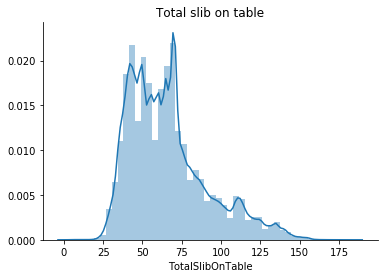

In [58]:
#REMOVAL OF OUTLIERS
sns.distplot(slibWerkbaar['TotalSlibOnTable'])
plt.title("Total slib on table")
sns.despine()


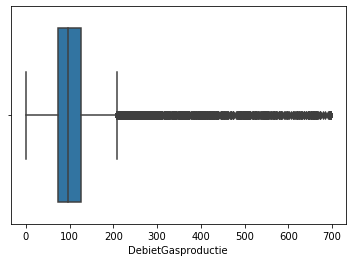

In [59]:
sns.boxplot(slibWerkbaar.DebietGasproductie)

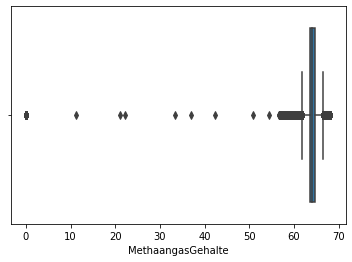

In [60]:
sns.boxplot(slibWerkbaar.MethaangasGehalte)

In [61]:
slibWerkbaar[slibWerkbaar['MethaangasGehalte'] > 66]

,Tijdsas,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
79061,2018-12-28 09:50:30,125.0,1171.0,232.0,44.720001,68.100006,0.0,137.0,66.019989
79062,2018-12-28 09:51:00,124.0,1165.5,232.5,44.730000,68.000000,0.0,141.0,66.059998
79063,2018-12-28 09:51:30,125.0,1186.0,233.0,44.740002,68.789978,0.0,135.0,66.100006
79064,2018-12-28 09:52:00,124.0,1158.0,234.0,44.750000,67.720001,0.0,130.0,66.119995
79065,2018-12-28 09:52:30,123.0,1174.0,233.0,44.769989,67.880005,0.0,132.0,66.149994
...,...,...,...,...,...,...,...,...,...
851155,2019-09-22 11:57:30,58.0,685.0,0.0,44.559998,68.079987,0.0,101.0,66.009979
851345,2019-09-22 13:32:30,49.0,703.5,0.0,43.940002,67.889984,0.0,103.0,66.019989
851346,2019-09-22 13:33:00,50.0,706.0,0.0,43.910004,68.070007,0.0,101.0,66.014984
851347,2019-09-22 13:33:30,49.0,686.0,0.0,43.880005,67.759979,0.0,104.0,66.009979


In [62]:
slibWerkbaar[slibWerkbaar['DebietGasproductie'] > 200]

,Tijdsas,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
81,2018-11-30 23:40:30,37.0,531.0,265.0,44.600006,68.079987,0.00,696.0,64.054993
184,2018-12-01 00:32:00,35.0,539.0,0.0,44.660004,68.049988,27.00,696.0,63.389984
227,2018-12-01 00:53:30,34.0,524.5,0.0,44.750000,67.910004,27.00,201.0,63.169994
228,2018-12-01 00:54:00,35.0,529.0,0.0,44.660004,67.850006,27.00,206.0,63.189991
229,2018-12-01 00:54:30,35.0,516.0,0.0,44.699982,67.910004,27.00,203.0,63.209991
...,...,...,...,...,...,...,...,...,...
993306,2019-11-10 20:33:00,67.0,701.0,0.0,45.864990,68.070007,0.00,237.0,64.579987
993307,2019-11-10 20:33:30,66.0,694.0,0.0,45.899994,67.850006,0.00,696.0,64.600006
994565,2019-11-11 07:02:30,80.0,651.0,266.0,45.619995,68.209991,32.75,330.0,64.704987
998001,2019-11-12 11:40:30,49.0,590.0,0.0,46.279999,68.029999,0.00,696.0,64.049988


In [63]:
Q1 = slibWerkbaar.DebietGasproductie.quantile(0.25)
Q3 = slibWerkbaar.DebietGasproductie.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

outlierFilter = (slibWerkbaar['DebietGasproductie'] >= Q1 - 1.5 * IQR) & (slibWerkbaar['DebietGasproductie'] <= Q3 + 1.5 *IQR)
slibWerkbaar = slibWerkbaar.loc[outlierFilter]  

In [64]:
Q1 = slibWerkbaar.MethaangasGehalte.quantile(0.25)
Q3 = slibWerkbaar.MethaangasGehalte.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

outlierFilter = (slibWerkbaar['MethaangasGehalte'] >= Q1 - 1.5 * IQR) & (slibWerkbaar['MethaangasGehalte'] <= Q3 + 1.5 *IQR)
slibWerkbaar = slibWerkbaar.loc[outlierFilter]  

In [65]:
slibWerkbaar.shape

(778717, 9)

In [66]:
slibWerkbaar.describe()

,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
count,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,7.787170e+05,778717.000000
mean,66.405739,959.500835,126.000263,44.919247,67.900910,5.047976,1.010660e+02,64.141852
std,25.291493,415.383721,121.210554,1.498208,1.392327,10.799249,3.755540e+01,0.846992
min,1.000000,0.000000,0.000000,35.500000,0.190002,0.000000,1.421085e-14,61.704987
25%,47.000000,644.000000,0.000000,44.190002,67.789978,0.000000,7.300000e+01,63.570007
50%,62.000000,827.000000,178.666672,45.029999,68.000000,0.000000,9.550000e+01,64.122498
75%,78.000000,1244.666667,256.000000,45.829987,68.190002,0.000000,1.270000e+02,64.690002
max,185.000000,3378.000000,510.000000,50.619995,116.169983,60.000000,2.080000e+02,66.464996


In [67]:
slibWerkbaar = slibWerkbaar.dropna()

In [68]:
#slibWerkbaar = slibWerkbaar.resample('16H', on='Tijdsas').mean()
#print(slibWerkbaar.shape)
#slibWerkbaar.head()

In [69]:
slibWerkbaar.describe()

,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
count,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,7.787170e+05,778717.000000
mean,66.405739,959.500835,126.000263,44.919247,67.900910,5.047976,1.010660e+02,64.141852
std,25.291493,415.383721,121.210554,1.498208,1.392327,10.799249,3.755540e+01,0.846992
min,1.000000,0.000000,0.000000,35.500000,0.190002,0.000000,1.421085e-14,61.704987
25%,47.000000,644.000000,0.000000,44.190002,67.789978,0.000000,7.300000e+01,63.570007
50%,62.000000,827.000000,178.666672,45.029999,68.000000,0.000000,9.550000e+01,64.122498
75%,78.000000,1244.666667,256.000000,45.829987,68.190002,0.000000,1.270000e+02,64.690002
max,185.000000,3378.000000,510.000000,50.619995,116.169983,60.000000,2.080000e+02,66.464996


In [70]:
slibWerkbaar = slibWerkbaar.dropna()

In [71]:
slibWerkbaar.describe()

,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
count,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,7.787170e+05,778717.000000
mean,66.405739,959.500835,126.000263,44.919247,67.900910,5.047976,1.010660e+02,64.141852
std,25.291493,415.383721,121.210554,1.498208,1.392327,10.799249,3.755540e+01,0.846992
min,1.000000,0.000000,0.000000,35.500000,0.190002,0.000000,1.421085e-14,61.704987
25%,47.000000,644.000000,0.000000,44.190002,67.789978,0.000000,7.300000e+01,63.570007
50%,62.000000,827.000000,178.666672,45.029999,68.000000,0.000000,9.550000e+01,64.122498
75%,78.000000,1244.666667,256.000000,45.829987,68.190002,0.000000,1.270000e+02,64.690002
max,185.000000,3378.000000,510.000000,50.619995,116.169983,60.000000,2.080000e+02,66.464996


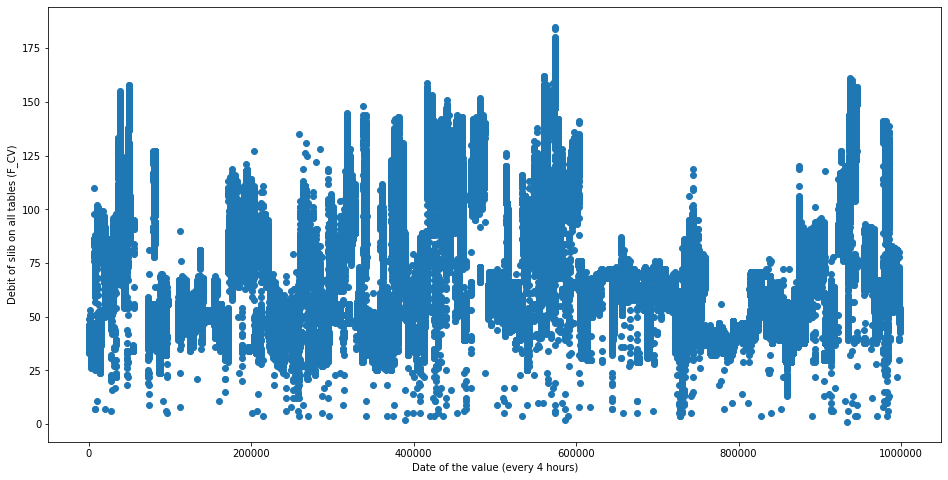

In [72]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(slibWerkbaar.index, slibWerkbaar.TotalSlibOnTable)
ax.set_ylabel('Debit of slib on all tables (F_CV)')
ax.set_xlabel('Date of the value (every 4 hours)')
plt.show()

In [73]:
slibWerkbaar.describe()

,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte
count,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,778717.000000,7.787170e+05,778717.000000
mean,66.405739,959.500835,126.000263,44.919247,67.900910,5.047976,1.010660e+02,64.141852
std,25.291493,415.383721,121.210554,1.498208,1.392327,10.799249,3.755540e+01,0.846992
min,1.000000,0.000000,0.000000,35.500000,0.190002,0.000000,1.421085e-14,61.704987
25%,47.000000,644.000000,0.000000,44.190002,67.789978,0.000000,7.300000e+01,63.570007
50%,62.000000,827.000000,178.666672,45.029999,68.000000,0.000000,9.550000e+01,64.122498
75%,78.000000,1244.666667,256.000000,45.829987,68.190002,0.000000,1.270000e+02,64.690002
max,185.000000,3378.000000,510.000000,50.619995,116.169983,60.000000,2.080000e+02,66.464996


In [74]:
slibWerkbaar['MethaanProductie'] = slibWerkbaar.DebietGasproductie * slibWerkbaar.MethaangasGehalte/100

In [75]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [76]:
temporary_X = slibWerkbaar.drop(['DebietGasproductie', 'MethaangasGehalte', 'MethaanProductie', 'Tijdsas'],axis=1)
normalised_X = normalize(temporary_X)
outputs = slibWerkbaar[['DebietGasproductie', 'MethaangasGehalte', 'MethaanProductie']]
slibWerkbaar = pd.concat([normalised_X, outputs], axis=1)

In [77]:
X = slibWerkbaar.drop(['DebietGasproductie', 'MethaangasGehalte', 'MethaanProductie'],axis=1)
y = slibWerkbaar['DebietGasproductie']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [79]:
slibWerkbaar

,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,MethaanProductie
0,0.190217,0.154825,0.359804,0.602017,0.584928,0.0,144.0,65.229980,93.931172
1,0.195652,0.150385,0.360784,0.602182,0.585360,0.0,142.0,65.190002,92.569803
2,0.195652,0.153345,0.361765,0.602347,0.584929,0.0,143.0,65.139984,93.150177
3,0.190217,0.162226,0.362745,0.602512,0.584670,0.0,144.0,65.109985,93.758379
4,0.201087,0.157194,0.360784,0.601852,0.584153,0.0,148.0,65.089996,96.333195
...,...,...,...,...,...,...,...,...,...
999355,0.260870,0.174660,0.000000,0.673280,0.584842,0.0,74.0,63.850006,47.249005
999356,0.255435,0.180284,0.000000,0.676586,0.585015,0.0,73.0,63.845001,46.606851
999357,0.260870,0.176584,0.000000,0.675926,0.583377,0.0,72.5,63.839996,46.283997
999358,0.260870,0.177472,0.000000,0.677248,0.584842,0.0,72.0,63.837494,45.962996


In [38]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
blub
poly = PolynomialFeatures(degree=3)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
for i in range(1, 6):

    poly = PolynomialFeatures(degree=i)

    X_train_transform = poly.fit_transform(X_train)

    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()

    model.fit(X_train_transform,y_train)

    y_predict = model.predict(X_test_transform)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))

    print('Root Mean Squared Error for i = ' + str(i) + ' is ' + str(RMSE))

    print()

Root Mean Squared Error for i = 1 is 37.27143127156862

Root Mean Squared Error for i = 2 is 36.328935673320714

Root Mean Squared Error for i = 3 is 35.60869788299291

Root Mean Squared Error for i = 4 is 34.90700450510501

Root Mean Squared Error for i = 5 is 51.47548978023164



In [40]:
#To retrieve the intercept:

print("Intercept")

print(model.intercept_)

print()

#For retrieving the coefficients:

print("Coefficients")

print(model.coef_)

print()

Intercept
13198.022380770162

Coefficients
[-5.40824551e-06 -1.06707365e+05 -2.00656119e+05 -1.70154585e+04
  9.52636163e+04 -1.18430616e+05 -4.02064598e+04  5.13892251e+03
  1.46712881e+05  4.87093224e+04  1.98146245e+05  3.47868631e+05
  2.27330370e+05  2.73198170e+05 -3.44364719e+04  5.17286468e+05
  5.77864126e+05 -5.93171884e+04  2.45473047e+04  4.85451616e+04
  1.56681791e+03  2.06093365e+03 -3.42801318e+05 -1.56004574e+05
 -2.38724049e+03  4.22144390e+05  2.31280753e+05 -3.50453057e+04
  1.57364115e+05 -3.29031821e+05  2.43981010e+04 -9.60297689e+04
 -1.01737568e+05 -8.96949316e+04  3.38020789e+05 -7.35700671e+04
 -2.04433526e+05 -3.20338825e+05 -4.42680922e+04 -3.29620998e+04
 -7.27678678e+04 -1.26694491e+05 -1.16703191e+04  9.07857177e+04
 -8.37591651e+05 -1.45831759e+05 -1.57956618e+05 -5.80987413e+05
 -3.20283090e+05 -3.13630930e+05  5.73857958e+04 -6.38564149e+05
 -5.80549155e+05  3.20478099e+04 -5.84665163e+04  3.13100923e+04
  1.68421727e+05  1.46718787e+04 -3.73276737e+0

In [41]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 27.52111448959509

Mean Squared Error: 2649.7260481147323

Root Mean Squared Error: 51.47548978023164

R square: -0.8794609121213086



In [42]:
arr = np.full((233616), slibWerkbaar.DebietGasproductie.mean())
MAE = metrics.mean_absolute_error(y_test,arr)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,arr))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,arr)
print('R square: ' + str(r2))  

30.94044577907656
Root Mean Squared Error: 37.5477622320603

R square: -1.015447418151183e-06


In [43]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)

print('Mean Absolute Error: '+ str(MAE))
r2 = metrics.r2_score(y_test,y_predict)

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

print('R square: ' + str(r2))  

Mean Absolute Error: 16.05982753521328
Mean Squared Error: 523.5825209565824

Root Mean Squared Error: 22.88192563917168

R square: 0.6286208972025688


In [44]:
arr = np.full((233616), slibWerkbaar.DebietGasproductie.mean())
MAE = metrics.mean_absolute_error(y_test,arr)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,arr))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,arr)
print('R square: ' + str(r2))  

30.94044577907656
Root Mean Squared Error: 37.5477622320603

R square: -1.015447418151183e-06


In [45]:
print(X_train.columns)
print(model.feature_importances_)

Index(['TotalSlibOnTable', 'TotalPEToTable', 'DebietSpuiSlib', 'TemperatuurTank', 'DebietSlibCirculatie', 'VermogenCompressor'], dtype='object')
[0.1932615  0.2969483  0.12618058 0.25560496 0.10086026 0.02714441]


In [46]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
184203,154.0,145.355833
296322,93.0,85.070000
89923,156.0,116.275833
663959,71.0,73.900834
537126,80.0,82.650000
...,...,...
614267,85.0,76.348333
672602,71.0,78.999167
624707,70.0,76.423333
984674,67.0,72.623333


In [47]:
df.describe()

,Actual,Predicted
count,2.336160e+05,233616.000000
mean,1.011038e+02,101.447204
std,3.754782e+01,29.845991
min,1.421085e-14,23.815000
25%,7.300000e+01,79.818958
50%,9.575000e+01,97.495000
75%,1.270000e+02,120.946875
max,2.080000e+02,204.886667


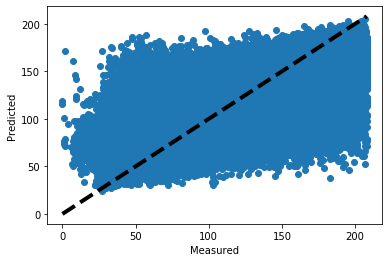

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [49]:
X = slibWerkbaar.drop(['DebietGasproductie', 'MethaangasGehalte', 'MethaanProductie'],axis=1)
y = slibWerkbaar['MethaangasGehalte']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

poly = PolynomialFeatures(degree=3)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#To retrieve the intercept:

print("Intercept")

print(model.intercept_)

print()

#For retrieving the coefficients:

print("Coefficients")

print(model.coef_)

print()

Intercept
57.333964944760964

Coefficients
[-1.98164026e-14  1.53763003e+01  3.40365444e+01 -8.08219680e+00
  2.14566959e+01  1.92561933e+00 -7.32024960e+00 -1.04026440e+01
 -1.60891308e+01  4.26354464e+00  1.69321923e+00 -3.49335497e+01
  3.56842453e+00  1.57791711e+01 -1.74369242e+00 -8.70355316e+01
 -3.46480608e+01 -2.69745314e-03  1.48036267e+01  9.60034279e+00
  1.79064858e+00 -7.13400283e-01 -3.00835323e+01 -3.63172100e-01
  1.31304687e+01  1.00006089e+01  9.95066830e+00 -4.92412035e+00
  2.33475981e+01 -1.97814447e+01 -9.22695100e-01  8.57347752e+00
 -3.72648857e+01  1.13484560e+01 -1.95148604e+00 -1.16684287e+00
 -3.05374144e+01  1.07850668e+02 -2.32399085e+01 -8.98756850e+00
  3.60497227e+00 -1.06568129e+00 -8.11612609e-01  2.09535830e+01
 -5.62412450e+01  6.88320834e+00  5.89947859e+01  2.25849030e+00
 -1.84070091e+01 -3.77430398e+01 -4.31633538e+00  3.96463152e+01
  4.81967359e+00  1.42712562e+01  1.16921788e+01  6.16568679e-01
 -2.32093972e+00  5.40650878e-01  3.00311054e+0

In [51]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 0.6223797705430416

Mean Squared Error: 0.6348709787423398

Root Mean Squared Error: 0.7967879132757598

R square: 0.11795024629695161



In [52]:
arr = np.full((233616), slibWerkbaar.MethaangasGehalte.mean())
MAE = metrics.mean_absolute_error(y_test,arr)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,arr))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,arr)
print('R square: ' + str(r2))  

0.6717985661896655
Root Mean Squared Error: 0.8483940786589329

R square: -6.597891826887192e-06


In [53]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)

print('Mean Absolute Error: '+ str(MAE))
r2 = metrics.r2_score(y_test,y_predict)

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()
print('R square: ' + str(r2)) 

Mean Absolute Error: 0.3216926811778306
Mean Squared Error: 0.23314188524762652

Root Mean Squared Error: 0.4828476832787194

R square: 0.6760873479082232


In [54]:
arr = np.full((233616), slibWerkbaar.MethaangasGehalte.mean())
MAE = metrics.mean_absolute_error(y_test,arr)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,arr))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,arr)
print('R square: ' + str(r2))  

0.6717985661896655
Root Mean Squared Error: 0.8483940786589329

R square: -6.597891826887192e-06


In [55]:
print(X_train.columns)
print(model.feature_importances_)

Index(['TotalSlibOnTable', 'TotalPEToTable', 'DebietSpuiSlib', 'TemperatuurTank', 'DebietSlibCirculatie', 'VermogenCompressor'], dtype='object')
[0.19529617 0.34461099 0.08345712 0.24951537 0.09125896 0.03586139]


In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
140647,65.556664,65.313129
587433,64.065002,63.807291
313417,65.179993,64.964244
6512,63.910004,64.099916
607953,63.470001,63.035277
...,...,...
655066,63.660004,64.585408
294110,63.139984,63.149531
160903,64.474991,64.366278
894413,65.339996,64.632661


In [57]:
df.describe()

,Actual,Predicted
count,233616.000000,233616.000000
mean,64.144031,64.143771
std,0.848393,0.694287
min,61.704987,61.738693
25%,63.570007,63.694487
50%,64.125000,64.123562
75%,64.690002,64.573291
max,66.464996,66.434870


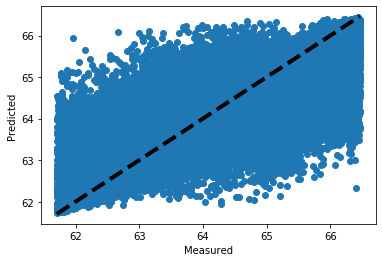

In [58]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [71]:
X = slibWerkbaar.drop(['DebietGasproductie', 'MethaangasGehalte', 'MethaanProductie'],axis=1)
y = slibWerkbaar['MethaanProductie']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

poly = PolynomialFeatures(degree=3)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
#To retrieve the intercept:

print("Intercept")

print(model.intercept_)

print()

#For retrieving the coefficients:

print("Coefficients")

print(model.coef_)

print()

Intercept
7.200184257789672

Coefficients
[ 1.37725287e-11 -1.04034878e+03  2.24283297e+03  3.38980913e+01
 -4.94299930e+02 -1.91686728e+02 -5.42560382e+02 -1.48667371e+03
  4.57038795e+03  5.42555666e+01  1.60880994e+03  6.15926423e+02
 -1.74168117e+02 -4.68811862e+03 -4.97108595e+01 -5.89961269e+02
 -4.11825245e+03 -2.09220937e+02 -2.14996080e+02  1.64479800e+02
  8.45865025e+00  2.42548263e+01  7.06888524e+01  1.77425848e+03
 -4.22526392e+02  7.37720141e+02  1.42777909e+03  1.69860220e+03
  8.54149692e+02 -1.50786186e+03  2.48794413e+02  1.25204915e+03
 -2.44359618e+02  8.95599561e+01 -5.51002871e+02 -5.69926125e+02
 -2.31376151e+03 -1.45241267e+03 -5.38083044e+01  1.88126257e+02
  1.41037241e+02 -3.47218822e+02  2.84725185e+01 -9.14630159e+01
 -3.30171798e+03  6.46748757e+01  2.48809559e+03 -1.92706339e+02
  3.62158478e+02  8.43246424e+02  1.78918769e+02  7.60541488e+02
  5.59300420e+03 -1.73710152e+02  4.20447460e+02 -1.21800068e+02
 -8.01407256e-01 -6.46848744e+00 -1.54944691e+02

In [73]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 18.512224662618518

Mean Squared Error: 527.1522771799382

Root Mean Squared Error: 22.95979697601741

R square: 0.1004751081223827



In [74]:
arr = np.full((233616), (slibWerkbaar.DerdeOutput/100).mean())
MAE = metrics.mean_absolute_error(y_test,arr)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,arr))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,arr)
print('R square: ' + str(r2))  

19.98683702906249
Root Mean Squared Error: 24.20816285864714

R square: -1.7582253157844008e-06


In [75]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)

print('Mean Absolute Error: '+ str(MAE))
r2 = metrics.r2_score(y_test,y_predict)

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()
print('R square: ' + str(r2)) 

Mean Absolute Error: 10.307395217659549
Mean Squared Error: 216.49954649762924

Root Mean Squared Error: 14.713923558916202

R square: 0.630568358356236


In [76]:
print(X_train.columns)
print(model.feature_importances_)

Index(['TotalSlibOnTable', 'TotalPEToTable', 'DebietSpuiSlib', 'TemperatuurTank', 'DebietSlibCirculatie', 'VermogenCompressor'], dtype='object')
[0.19544538 0.29676888 0.12388514 0.25635575 0.1008267  0.02671816]


In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
634077,48.427201,49.046179
992248,70.163295,58.194504
512219,73.187979,70.485217
627265,38.284399,41.863082
605092,49.670394,74.436496
...,...,...
536705,50.127005,49.556696
7078,81.232202,73.716666
700079,48.172485,55.471511
347384,86.808782,76.929666


In [78]:
df.describe()

,Actual,Predicted
count,2.336160e+05,233616.000000
mean,6.486135e+01,65.045371
std,2.420819e+01,19.264506
min,8.899548e-15,17.610465
25%,4.644189e+01,50.950067
50%,6.112921e+01,62.380348
75%,8.162339e+01,77.651946
max,1.370720e+02,130.609097


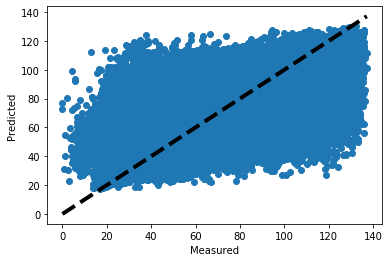

In [79]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [80]:
slibWerkbaar

,TotalSlibOnTable,TotalPEToTable,DebietSpuiSlib,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,DerdeOutput
0,0.190217,0.154825,0.359804,0.602017,0.584928,0.0,144.0,65.229980,9393.117188
1,0.195652,0.150385,0.360784,0.602182,0.585360,0.0,142.0,65.190002,9256.980347
2,0.195652,0.153345,0.361765,0.602347,0.584929,0.0,143.0,65.139984,9315.017731
3,0.190217,0.162226,0.362745,0.602512,0.584670,0.0,144.0,65.109985,9375.837891
4,0.201087,0.157194,0.360784,0.601852,0.584153,0.0,148.0,65.089996,9633.319458
...,...,...,...,...,...,...,...,...,...
999355,0.260870,0.174660,0.000000,0.673280,0.584842,0.0,74.0,63.850006,4724.900452
999356,0.255435,0.180284,0.000000,0.676586,0.585015,0.0,73.0,63.845001,4660.685089
999357,0.260870,0.176584,0.000000,0.675926,0.583377,0.0,72.5,63.839996,4628.399734
999358,0.260870,0.177472,0.000000,0.677248,0.584842,0.0,72.0,63.837494,4596.299561
